In [2]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display
import seaborn as sns
import visuals as vs
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# Pretty display for notebooks
%matplotlib inline

# Data Upload and Cleaning

In [3]:
data = pd.read_csv("..\Datasets\car\car.data")

In [4]:
display(data.head(n=10))

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [5]:
print(data.isna().sum().sum())
print(data.isnull().sum().sum())
data.shape

0
0


(1727, 7)

In [6]:
datanum = pd.DataFrame(columns = data.columns)

In [7]:
categorical = ['vhigh', 'vhigh.1', 'small', 'low', 'unacc']
datanum['vhigh'] = data['vhigh'].replace(['low', 'med', 'high', 'vhigh'],
                        [0, 1, 2, 3])
datanum['vhigh.1'] = data['vhigh.1'].replace(['low', 'med', 'high', 'vhigh'],
                        [0, 1, 2, 3])
datanum['small'] = data['small'].replace(['small', 'med', 'big'], [0, 1, 2])
datanum['low'] = data['low'].replace(['low', 'med', 'high'], [0, 1, 2])
datanum['unacc'] = data['unacc'].replace(['unacc', 'acc', 'good', 'vgood'], [0, 1, 2, 3])
datanum['2'] = data['2'].replace('5more',5)
datanum['2.1'] = data['2.1'].replace('more',5)
#datanum = datanum.astype('object').astype('int64')

In [8]:
datanum.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,2,2,0,1,0
1,3,3,2,2,0,2,0
2,3,3,2,2,1,0,0
3,3,3,2,2,1,1,0
4,3,3,2,2,1,2,0


In [9]:
datanum.describe()
datanum['vhigh'].unique()

array([3, 2, 1, 0], dtype=int64)

We can see that output data is skewed because there are very few 2 and 3 types.

C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


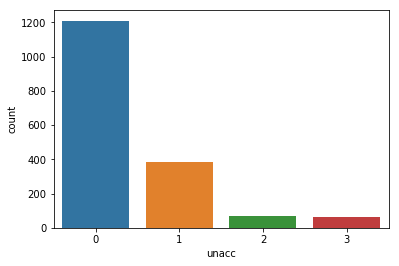

In [10]:
plt = sns.countplot(datanum['unacc'])

In [11]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10,8))
#plt = sns.heatmap(correlation, annot=True)

Separate X and Y data.

In [12]:
output = datanum[['unacc']]
features = datanum.drop(columns='unacc')


In [13]:
# Import train_test_split
# Split into training, validation and testing.
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, output, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1381 samples.
Testing set has 346 samples.


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1104 samples.
Validation set has 277 samples.
Testing set has 346 samples.


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
# Do scaling on training. Apply the same transformation to validation and testing.
X_train_np = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(data=X_train_np,columns=X_train.columns)
X_val_np = scaler.transform(X_val)
X_val_std = pd.DataFrame(data=X_val_np,columns=X_train.columns)
X_test_np = scaler.transform(X_test)
X_test_std = pd.DataFrame(data=X_test_np,columns=X_train.columns)


Plots below show that both training and testing data are representative i.e. divided well.

C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


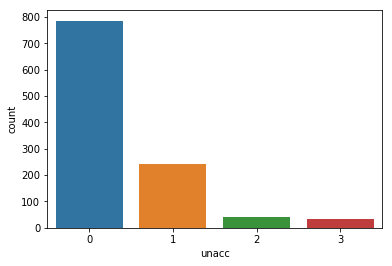

In [16]:
y_train.describe()
plt = sns.countplot(y_train['unacc'])


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


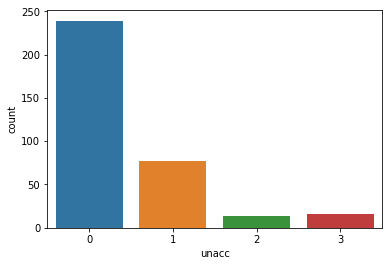

In [17]:
plt = sns.countplot(y_test['unacc'])


# Training and Validation

Create a function to train and predict the selected learner.

In [18]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[0:sample_size],y_train[0:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the training samples which is y_train
    results['acc_train'] = accuracy_score(y_train[0:sample_size],predictions_train)
    
     # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[0:sample_size],predictions_train,beta=1.,average='macro')
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1.,average='macro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results



The dimensions are reduced from (n,) to (n).

In [19]:
y_train = y_train.squeeze()
y_val = y_val.squeeze()
y_test = y_test.squeeze()

Classifiers want the X values as object type.

In [20]:
X_train_std = X_train_std.astype('object')
X_val_std = X_val_std.astype('object')
X_test_std = X_test_std.astype('object')

#Check if cross validation helps

In [21]:
from sklearn import tree
from sklearn.model_selection import cross_validate
cv = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split = 5, random_state=42)
cv_results = cross_validate(cv, X_train, y_train, cv=5)
sorted(cv_results.keys())
cv_results['test_score']

array([0.87782805, 0.88235294, 0.85067873, 0.83710407, 0.85      ])

In [22]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier



# TODO: Initialize the three models
clf_1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split = 5, random_state=42)
clf_2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter = 10000, random_state=42, activation = 'tanh',
                      early_stopping = True, n_iter_no_change = 100)
clf_3 = AdaBoostClassifier(random_state=42)
clf_4 = svm.SVC(random_state=42,gamma=50,kernel='rbf')
clf_5 = KNeighborsClassifier(n_neighbors=5)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_1, clf_2, clf_3, clf_4, clf_5]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train_std, y_train, X_test_std, y_test)
        if clf==clf_2:
            print(clf.n_iter_)

# Run metrics visualization for the three supervised learning models chosen


DecisionTreeClassifier trained on 11 samples.
DecisionTreeClassifier trained on 110 samples.
DecisionTreeClassifier trained on 1104 samples.
MLPClassifier trained on 11 samples.
102
MLPClassifier trained on 110 samples.
142
MLPClassifier trained on 1104 samples.
401
AdaBoostClassifier trained on 11 samples.
AdaBoostClassifier trained on 110 samples.
AdaBoostClassifier trained on 1104 samples.
SVC trained on 11 samples.
SVC trained on 110 samples.
SVC trained on 1104 samples.
KNeighborsClassifier trained on 11 samples.
KNeighborsClassifier trained on 110 samples.
KNeighborsClassifier trained on 1104 samples.


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


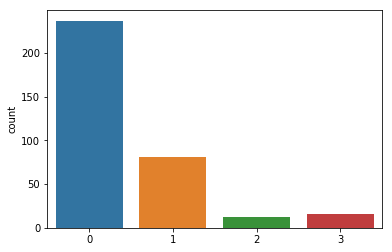

In [23]:
estimate = clf_2.predict(X_test_std)
sns.countplot(estimate)

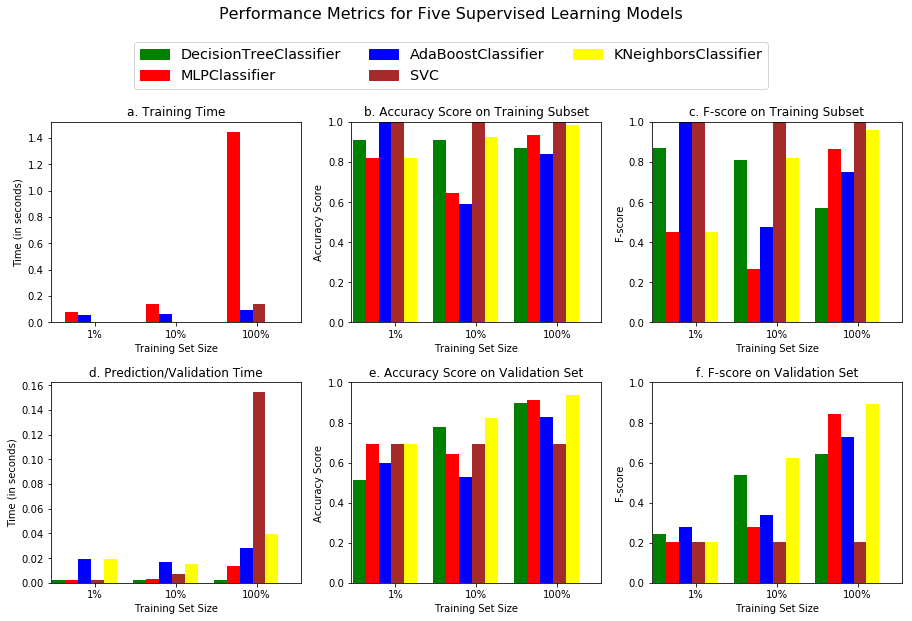

In [24]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,8))

    # Constants
    bar_width = 0.16
    colors = ['green','red','blue', 'brown', 'yellow']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("a. Training Time")
    ax[0, 1].set_title("b. Accuracy Score on Training Subset")
    ax[0, 2].set_title("c. F-score on Training Subset")
    ax[1, 0].set_title("d. Prediction/Validation Time")
    ax[1, 1].set_title("e. Accuracy Score on Validation Set")
    ax[1, 2].set_title("f. F-score on Validation Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.7), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Five Supervised Learning Models", fontsize = 16, x = 0.63, y = 1.1)
    # Tune the subplot layout
    # Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html for more details on the arguments
    pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
    pl.tight_layout()
    pl.show()
evaluate(results)

# Decision Tree Hyperparameter Optimization

In [25]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = tree.DecisionTreeClassifier(random_state=42, criterion = "gini")

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'min_samples_leaf': [2, 4, 6],
              'min_samples_split': [2, 5, 10],
              'max_depth': [3,5,7,9,10,12,15,20]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=1.,average='macro')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=4,verbose=3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_std,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_std, y_train)).predict(X_val_std)
best_predictions = best_clf.predict(X_val_std)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 1., average ="macro")))
print("\nOptimized Model\n------")
print("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 1., average ="macro")))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Unoptimized model
------
Accuracy score on validation data: 0.9675
F-score on validation data: 0.9500

Optimized Model
------
Final accuracy score on the validation data: 0.9567
Final F-score on the validation data: 0.8846


In [26]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [27]:
#max_depth validation curve
from copy import deepcopy
learner = deepcopy(best_clf)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
for i, depth in enumerate(list(range(2,22,2))):
    learner = learner.set_params(max_depth=depth)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(depth)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
#min_samples_leaf validation curve
learner = deepcopy(best_clf)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
for i, param in enumerate(list(range(1,20))):
    learner = learner.set_params(min_samples_leaf=param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1,average='macro'))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
    

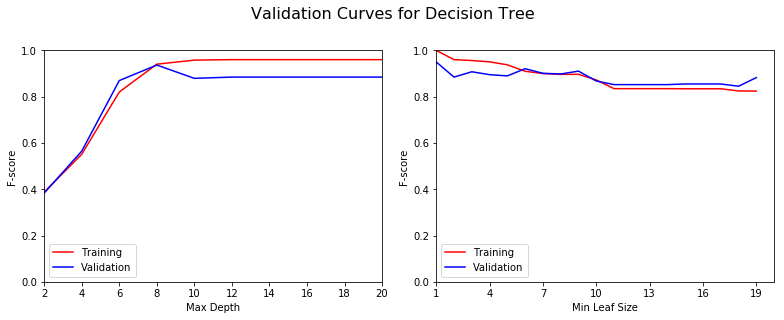

In [28]:

# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(results["X"])
ax[0].legend()
ax[0].set_xlabel("Max Depth")
ax[0].set_ylabel("F-score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((2, 20))
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 20, 3)))
ax[1].legend()
ax[1].set_xlabel("Min Leaf Size")
ax[1].set_ylabel("F-score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((1, 20))


# Aesthetics
pl.suptitle("Validation Curves for Decision Tree", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()
    

In [29]:
final_tree_learner = deepcopy(best_clf)
final_tree_learner.set_params(max_depth = 8, min_samples_leaf = 1)
final_tree_learner = final_tree_learner.fit(X_train_std,y_train)
print(final_tree_learner.get_params())

final_predictions = final_tree_learner.predict(X_test_std)

print("")
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions, beta = 1., average ="macro")))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

Final F-score on the testing data: 0.8706


# Neural Network Hyper Parameter Optimization

In [30]:
# TODO: Initialize the classifier
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter = 10000, random_state=42, activation = 'tanh',
                      early_stopping = True, n_iter_no_change = 100)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'hidden_layer_sizes': [(3), (5), (10), (15), (20),
                                     (3, 3), (5, 5), (10, 10), (15, 15), (20, 20),
                                     (3, 3, 3), (5, 5, 5), (10, 10, 10), (15, 15, 15), (20, 20, 20)],
              'max_iter': [1000, 10000, 20000]}
# 'activation': ['identity', 'logistic', 'tanh', 'relu']
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=1., average='macro')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=4,verbose=3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_std,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_std, y_train)).predict(X_val_std)
best_predictions = best_clf.predict(X_val_std)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 1., average ="macro")))
print("\nOptimized Model\n------")
print("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 1., average ="macro")))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Unoptimized model
------
Accuracy score on validation data: 0.9242
F-score on validation data: 0.8594

Optimized Model
------
Final accuracy score on the validation data: 0.9134
Final F-score on the validation data: 0.8242


In [31]:
best_clf.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (20, 20, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 100,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [32]:
#no of layers
learner = deepcopy(best_clf)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
l = [(20), (20, 20), (20, 20, 20), (20, 20, 20, 20), (20, 20, 20, 20, 20), (20, 20, 20, 20, 20, 20)
     , (20, 20, 20, 20, 20, 20, 20)]
for i, param in enumerate(l):
    learner = learner.set_params(hidden_layer_sizes = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(i+1)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
#no of neurons
#learner = deepcopy(best_clf)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
l = [(1,1,1,1), (3,3,3,3), (5,5,5,5), (10, 10, 10,10), (15, 15, 15,15), (20,20,20,20), (25,25,25,25), (30, 30, 30,30)]
for i, param in enumerate(l):
    learner = learner.set_params(hidden_layer_sizes=param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param[0])
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
    

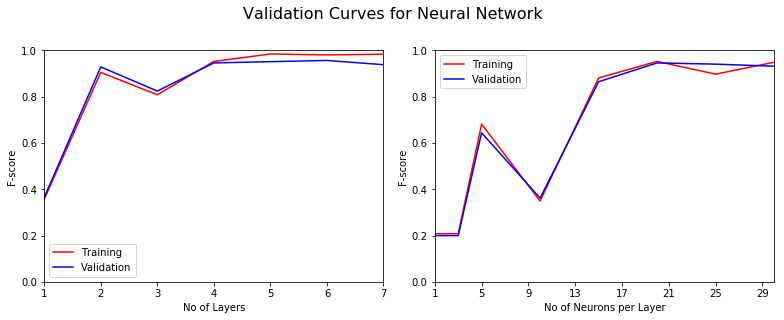

In [33]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(results["X"])
ax[0].legend()
ax[0].set_xlabel("No of Layers")
ax[0].set_ylabel("F-score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((1, 7))
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 30, 4)))
ax[1].legend()
ax[1].set_xlabel("No of Neurons per Layer")
ax[1].set_ylabel("F-score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((1, 30))


# Aesthetics
pl.suptitle("Validation Curves for Neural Network", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [35]:
final_nn = deepcopy(best_clf)
final_nn.set_params(hidden_layer_sizes = ((20,20,20,20))) # 4 layers, 10 neurons each
start = time()
final_nn = final_nn.fit(X_train_std,y_train)
end = time()
print("time",end-start)
print(final_nn.get_params())

train_predictions = final_nn.predict(X_train_std)
final_predictions = final_nn.predict(X_test_std)

print("")
print("Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_predictions, beta = 1., average ="macro")))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions, beta = 1., average ="macro")))

time 2.351435899734497
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Final F-score on the training data: 0.9524
Final F-score on the testing data: 0.8414


In [36]:
final_nn.n_iter_

369

# Optimization of Boosting Hyperparameters

In [95]:
# TODO: Initialize the classifier

clf = AdaBoostClassifier(random_state=42)
base = [tree.DecisionTreeClassifier(max_depth=1)]
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'base_estimator': base,
              'n_estimators': list(range(10,100,5))}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=1., average='macro')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=4,verbose=3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_std,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_std, y_train)).predict(X_val_std)
best_predictions = best_clf.predict(X_val_std)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 1., average ="macro")))
print("\nOptimized Model\n------")
print("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 1., average ="macro")))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Unoptimized model
------
Accuracy score on validation data: 0.8412
F-score on validation data: 0.7952

Optimized Model
------
Final accuracy score on the validation data: 0.8628
Final F-score on the validation data: 0.8179


In [96]:
best_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 1.0,
 'n_estimators': 30,
 'random_state': 42}

In [97]:
#no of layers
learner = deepcopy(best_clf)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
for i, param in enumerate(list(range(1,100))):
    learner = learner.set_params(n_estimators = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
#no of neurons
learner = deepcopy(best_clf)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
for i, param in enumerate(list(range(1,15))):
    learner = learner.set_params(base_estimator__max_depth=param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
    

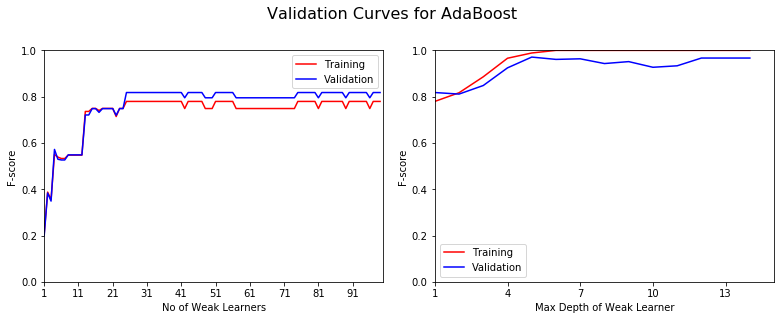

In [98]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("No of Weak Learners")
ax[0].set_ylabel("F-score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((1, 100))
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 15, 3)))
ax[1].legend()
ax[1].set_xlabel("Max Depth of Weak Learner")
ax[1].set_ylabel("F-score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((1, 15))


# Aesthetics
pl.suptitle("Validation Curves for AdaBoost", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [99]:
final_ADB = deepcopy(best_clf)
final_ADB.set_params(n_estimators=26,base_estimator__max_depth=5)
final_ADB = final_ADB.fit(X_train_std,y_train)
print(final_ADB.get_params())

final_predictions = final_ADB.predict(X_val_std)

print("")
print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, final_predictions, beta = 1., average ="macro")))

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 5, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 1.0, 'n_estimators': 26, 'random_state': 42}

Final F-score on the validation data: 0.9552


In [100]:
final_predictions = final_ADB.predict(X_test_std)

print("")
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions, beta = 1., average ="macro")))


Final F-score on the testing data: 0.9160


# SVC Hyperparameter Optimization

In [77]:
#no of layers
learner = svm.SVC(random_state=42, kernel = 'poly', C = 1, gamma = 1)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
l = [0.01, 0.1, 1, 10]
for i, param in enumerate(l):
    learner = learner.set_params(C = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
#no of neurons
learner = svm.SVC(random_state=42, kernel = 'poly', C = 1, gamma = 1)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
for i, param in enumerate(l):
    learner = learner.set_params(gamma  = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
    

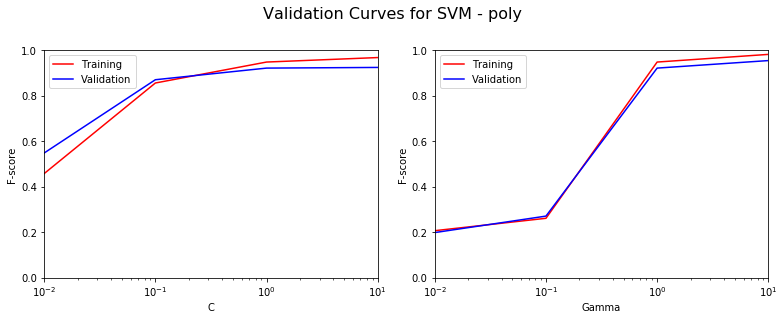

In [78]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("C")
ax[0].set_ylabel("F-score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((0.01, 10))
ax[0].set_xscale("log")
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 100, 10)))
ax[1].legend()
ax[1].set_xlabel("Gamma")
ax[1].set_ylabel("F-score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((0.01, 10))
ax[1].set_xscale("log")


# Aesthetics
pl.suptitle("Validation Curves for SVM - poly", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [101]:
#no of layers
learner = svm.SVC(random_state=42, kernel = 'rbf', C = 1, gamma = 1)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
l = [0.01, 0.1, 1, 10, 100]
for i, param in enumerate(l):
    learner = learner.set_params(C = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
#no of neurons
learner = svm.SVC(random_state=42, kernel = 'rbf', C = 100, gamma = 1)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
for i, param in enumerate(l):
    learner = learner.set_params(gamma  = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
    

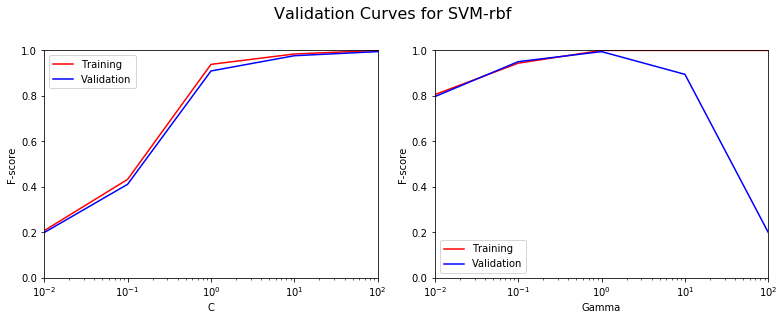

In [102]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("C")
ax[0].set_ylabel("F-score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((0.01, 100))
ax[0].set_xscale("log")
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 100, 10)))
ax[1].legend()
ax[1].set_xlabel("Gamma")
ax[1].set_ylabel("F-score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((0.01, 100))
ax[1].set_xscale("log")


# Aesthetics
pl.suptitle("Validation Curves for SVM-rbf", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [103]:
#Kernel type
learner = svm.SVC(random_state=42, kernel = 'rbf', C = 100, gamma = 1)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
kernel = {"linear", "poly", "rbf", "sigmoid"}
for i, param in enumerate(kernel):
    learner = learner.set_params(kernel = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
# degree of poly  
learner = svm.SVC(random_state=42, kernel = 'poly', C = 1, gamma = 1)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
degree = [1, 2, 3, 4, 5]
for i, param in enumerate(degree):
    learner = learner.set_params(degree  = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))

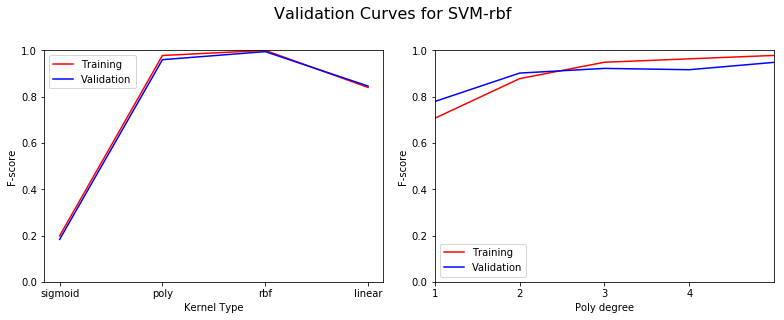

In [104]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
#ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("Kernel Type")
ax[0].set_ylabel("F-score")
ax[0].set_ylim((0, 1))
#ax[0].set_xlim((0.01, 100))
#ax[0].set_xscale("log")
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
ax[1].set_xticks(list(range(1, 5)))
ax[1].legend()
ax[1].set_xlabel("Poly degree")
ax[1].set_ylabel("F-score")
ax[1].set_ylim((0, 1))
ax[1].set_xlim((1, 5))
#ax[1].set_xscale("log")


# Aesthetics
pl.suptitle("Validation Curves for SVM-rbf", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [107]:
final_svm = svm.SVC(random_state=42,  kernel = 'rbf', C = 100, gamma = 1)
final_svm = final_svm.fit(X_train_std, y_train)
final_predictions = final_svm.predict(X_test_std)
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions, beta = 1., average ="macro")))

Final F-score on the testing data: 0.9978


# KNN Hyperparameter Optimization

In [84]:
#no of layers
learner = KNeighborsClassifier(n_neighbors=1)
results = {}
results["X"] = []
results["f_train"] = []
results["f_val"] = []
l = list(range(1,100))
for i, param in enumerate(l):
    learner = learner.set_params(n_neighbors = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results["X"].append(param)
    results["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
#no of neurons
learner = KNeighborsClassifier(n_neighbors=1)
results2 = {}
results2["X"] = []
results2["f_train"] = []
results2["f_val"] = []
l = ["uniform", "distance"]
for i, param in enumerate(l):
    learner = learner.set_params(weights  = param)
    learner = learner.fit(X_train_std,y_train)
    predictions_train = learner.predict(X_train_std)
    predictions_val = learner.predict(X_val_std)
    results2["X"].append(param)
    results2["f_train"].append(fbeta_score(y_train,predictions_train,beta=1.,average='macro'))
    results2["f_val"].append(fbeta_score(y_val,predictions_val,beta=1.,average='macro'))
    
    

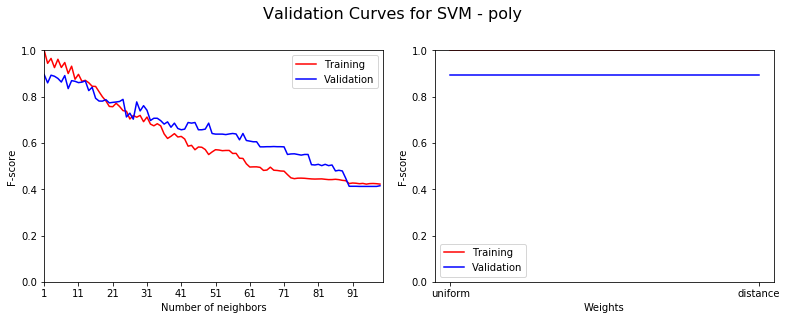

In [85]:
# Create figure
fig, ax = pl.subplots(ncols = 2, figsize = (11,4))

# max_depth
ax[0].plot(results["X"],results["f_train"],color="red",label='Training')
ax[0].plot(results["X"],results["f_val"],color="blue", label = 'Validation')
ax[0].set_xticks(list(range(1, 100, 10)))
ax[0].legend()
ax[0].set_xlabel("Number of neighbors")
ax[0].set_ylabel("F-score")
ax[0].set_ylim((0, 1))
ax[0].set_xlim((1, 100))
    
# max_leaf_size
ax[1].plot(results2["X"],results2["f_train"],color="red",label='Training')
ax[1].plot(results2["X"],results2["f_val"],color="blue", label = 'Validation')
#ax[1].set_xticks(list(range(1, 100, 10)))
ax[1].legend()
ax[1].set_xlabel("Weights")
ax[1].set_ylabel("F-score")
ax[1].set_ylim((0, 1))
#ax[1].set_xlim((0.01, 10))


# Aesthetics
pl.suptitle("Validation Curves for SVM - poly", fontsize = 16, x = 0.5, y = 1.1)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [109]:
final_knn = KNeighborsClassifier(n_neighbors=1)
final_knn = final_knn.fit(X_train_std, y_train)
final_predictions = final_svm.predict(X_test_std)
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, final_predictions, beta = 1., average ="macro")))

Final F-score on the testing data: 0.9978
